In [16]:
# univariate lstm example
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

#library declaration
import pandas as pd #read data
import matplotlib.pyplot as plt #draw chart
import numpy as np #Data processing
from sklearn.preprocessing import MinMaxScaler
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model

# the layers to build models
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense

# checking model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error


In [17]:
#--------------------- Data Preprocessing --------------------#
# Assuming you have a CSV file named "Petro_Price_Dataset.csv" with columns 'Date' and 'Petro_Price'
dataset_train = pd.read_csv("D:\DA\BDA_Code-master\BDA_Code-master\E95_price_1.csv")
training_set = dataset_train.iloc[:, 1:2].values

In [18]:
# Feature scaling
sc = MinMaxScaler(feature_range=(0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [19]:
X_train = []
y_train = []

# Adjust the range and indices according to your dataset
for i in range(90, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-90:i, 0])
    y_train.append(training_set_scaled[i, 0])

In [20]:
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [21]:
#--------------------- Building LSTM model --------------------#
regressor = Sequential()

regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units=1))

In [22]:
#--------------------- Compiling the LSTM model --------------------#
regressor.compile(optimizer='adam', loss='mean_squared_error')

#--------------------- Training LSTM model --------------------#
regressor.fit(X_train, y_train, epochs=120, batch_size=32)

Epoch 1/120
1/1 [==============================] - 8s 8s/step - loss: 0.3495
Epoch 2/120
1/1 [==============================] - 0s 86ms/step - loss: 0.2651
Epoch 3/120
1/1 [==============================] - 0s 87ms/step - loss: 0.1878
Epoch 4/120
1/1 [==============================] - 0s 83ms/step - loss: 0.1103
Epoch 5/120
1/1 [==============================] - 0s 81ms/step - loss: 0.0377
Epoch 6/120
1/1 [==============================] - 0s 86ms/step - loss: 0.0237
Epoch 7/120
1/1 [==============================] - 0s 89ms/step - loss: 0.0783
Epoch 8/120
1/1 [==============================] - 0s 87ms/step - loss: 0.0594
Epoch 9/120
1/1 [==============================] - 0s 89ms/step - loss: 0.0218
Epoch 10/120
1/1 [==============================] - 0s 95ms/step - loss: 0.0166
Epoch 11/120
1/1 [==============================] - 0s 92ms/step - loss: 0.0252
Epoch 12/120
1/1 [==============================] - 0s 85ms/step - loss: 0.0392
Epoch 13/120
1/1 [==============================] -

In [29]:
#--------------------- Testing LSTM model --------------------#
# Assuming you have a CSV file named "Petro_Price_Testset.csv" with columns 'Date' and 'Petro_Price'
dataset_test = pd.read_csv("D:\DA\BDA_Code-master\BDA_Code-master\Test.csv")
real_petro_price = dataset_test.iloc[:, 1:2].values

In [31]:
dataset_total = pd.concat((dataset_train['E95'], dataset_test['E95']), axis=0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 90:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)

In [32]:
X_test = []
for i in range(90, len(inputs)):
    X_test.append(inputs[i-90:i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [33]:
predicted_petro_price = regressor.predict(X_test)
predicted_petro_price = sc.inverse_transform(predicted_petro_price)

1/1 [==============================] - 2s 2s/step


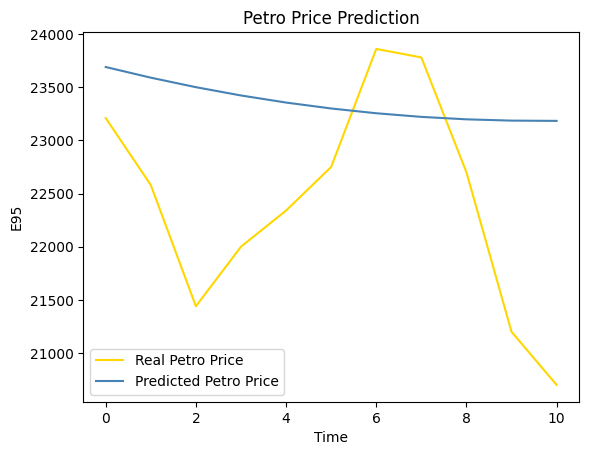

In [34]:
#--------------------- Visualizing the LSTM model results--------------------#
plt.plot(real_petro_price, color='#ffd700', label="Real Petro Price")
plt.plot(predicted_petro_price, color='#4782B4', label="Predicted Petro Price")
plt.title("Petro Price Prediction")
plt.xlabel("Time")
plt.ylabel("E95")
plt.legend()
plt.show()